<a href="https://colab.research.google.com/github/andresccopa/python-cnn-resnet/blob/main/PruebaResnet50_Nuevo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
from tqdm import tqdm
import numpy as np

from tensorflow.keras import Sequential, layers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
root_dir = "/content/drive/My Drive/Ciclo X/Tesis I/cervical cancer/"
base_dir = root_dir + 'Desarrollo Tesis/Desarrollo/nuevodataset/'

train_dir = base_dir + 'train/'
validation_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

train_data_dir = '/content/drive/My Drive/Ciclo X/Tesis I/cervical cancer/Desarrollo Tesis/Desarrollo/nuevosdatos/train/'
val_data_dir = '/content/drive/My Drive/Ciclo X/Tesis I/cervical cancer/Desarrollo Tesis/Desarrollo/nuevosdatos/val/'
test_data_dir = '/content/drive/My Drive/Ciclo X/Tesis I/cervical cancer/Desarrollo Tesis/Desarrollo/nuevosdatos/test/'

In [ ]:
datagen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range = 20,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,
    #fill_mode = "nearest"
)

In [ ]:
def get_data(Dir):
    X = []
    y = []
    for nextD ir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['SCC']:
                etiqueta = 3
            elif nextDir in ['HSIEL']:
                etiqueta = 2
            elif nextDir in ['LSIEL']:
                etiqueta = 1
            elif nextDir in ['NIM']:
                etiqueta = 0
                
            temp = Dir + nextDir
            num = 0
            for file in tqdm(os.listdir(temp)):
                img = temp + '/' + file
                if img is not None:
                    img_file = image.load_img(img, target_size=(240, 320))
                    img_tensor = image.img_to_array(img_file) 
                    #img_tensor /= 255.
                    pic_n = img_tensor.reshape(img_tensor.shape[0]*img_tensor.shape[1], img_tensor.shape[2])
                    kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
                    img_end = kmeans.cluster_centers_[kmeans.labels_]
                    cluster_pic = img_end.reshape(img_tensor.shape[0],img_tensor.shape[1], img_tensor.shape[2])
                    
                    if etiqueta in [3,2,1]:
                      samples = np.expand_dims(cluster_pic, 0)
                      it = datagen.flow(samples, batch_size=1)
                      band = 3
                      if etiqueta == 3:
                        band = 6
                      elif etiqueta == 1:
                        band = 5
                      elif etiqueta == 2:
                        band = 4
                      for i in range(band):
                        batch = it.next()
                        image_au = batch[0]
                        image_au /= 255.
                        X.append(image_au)
                        y.append(etiqueta)
                    else:
                      cluster_pic /= 255.
                      X.append(cluster_pic)
                      y.append(etiqueta)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [ ]:
x_train, y_train = get_data(train_dir)
x_val, y_val = get_data(validation_dir)
x_test, y_test = get_data(test_dir)

 79%|███████▉  | 58/73 [02:10<00:33,  2.21s/it]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(622, 240, 320, 3)
(622,)
(159, 240, 320, 3)
(159,)
(194, 240, 320, 3)
(194,)


In [ ]:
LOAD_FROM_IMAGES = False
if LOAD_FROM_IMAGES:
    np.save(train_data_dir + 'xtrain_new5.npy', x_train)
    np.save(train_data_dir +'ytrain_new5.npy', y_train)
    np.save(val_data_dir +'xval_new5.npy', x_val)
    np.save(val_data_dir + 'yval_new5.npy', y_val)
    np.save(test_data_dir + 'xtest_new5.npy', x_test)
    np.save(test_data_dir + 'ytest_new5.npy', y_test)
else:
    x_train = np.load(train_data_dir + 'xtrain_new4.npy')
    y_train = np.load(train_data_dir + 'ytrain_new4.npy')
    x_val = np.load(val_data_dir + 'xval_new4.npy')
    y_val = np.load(val_data_dir + 'yval_new4.npy')
    x_test = np.load(test_data_dir + 'xtest_new4.npy')
    y_test = np.load(test_data_dir + 'ytest_new4.npy')

In [ ]:
y_val

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

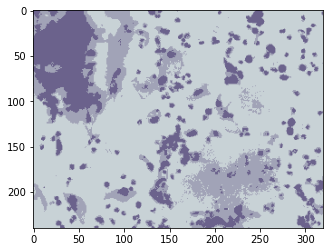

In [ ]:
plt.imshow(x_test[10])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,4)
y_val = to_categorical(y_val,4)

In [ ]:
resnet = ResNet50(weights='imagenet',include_top=False, input_shape=(240,320,3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 320, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 120, 160, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 120, 160, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model = Sequential()

model.add(resnet)

model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu' ))
model.add(layers.GaussianNoise(0.2))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu' ))
#model.add(layers.Dropout(0.2))
model.add(layers.GaussianNoise(0.2))
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.GaussianNoise(0.2))
#model.add(layers.Dense(64, activation='relu' ))
#model.add(layers.GaussianNoise(0.2))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

NameError: ignored

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 100,
    verbose = 1
)

Epoch 1/100
20/20 [==============================] - 30s 805ms/step - loss: 5.0975 - accuracy: 0.7685 - val_loss: 14.9494 - val_accuracy: 0.6164
Epoch 2/100
20/20 [==============================] - 13s 646ms/step - loss: 0.0205 - accuracy: 0.9952 - val_loss: 13.9907 - val_accuracy: 0.6164
Epoch 3/100
20/20 [==============================] - 13s 662ms/step - loss: 0.0036 - accuracy: 0.9984 - val_loss: 11.6145 - val_accuracy: 0.6164
Epoch 4/100
20/20 [==============================] - 13s 655ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 10.3800 - val_accuracy: 0.6164
Epoch 5/100
20/20 [==============================] - 13s 643ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 26.9553 - val_accuracy: 0.6164
Epoch 6/100
20/20 [==============================] - 13s 637ms/step - loss: 5.1573e-05 - accuracy: 1.0000 - val_loss: 28.8024 - val_accuracy: 0.6164
Epoch 7/100
20/20 [==============================] - 13s 638ms/step - loss: 0.3888 - accuracy: 0.9518 - val_loss: 593.7035 - v

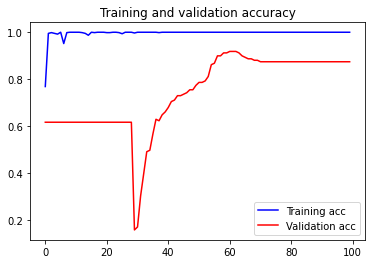

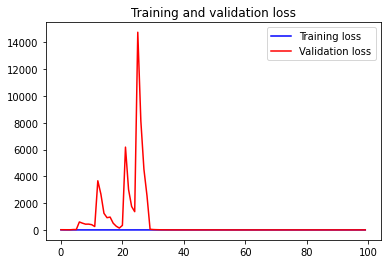

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
print("The best Training accuracy {}".format(max(acc)*100))
print("The best validation accuracy {} ".format(max(val_acc)*100))
print("The best Training loss {}".format(min(loss)*100))
print("The best validation loss {} ".format(min(val_loss)*100))

The best Training accuracy 100.0
The best validation accuracy 91.82389974594116 
The best Training loss 0.0
The best validation loss 48.19395840167999 


In [ ]:
y_pred = model.predict(x_test).argmax(axis=1)
print(y_pred)

[2 2 2 2 0 2 2 2 2 2 3 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 0 2 2 2 2 2 2 2
 2 3 2 2 3 2 2 2 2 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [ ]:
def contar_veces(elemento, lista):
  veces = 0
  for i in lista:
    if elemento == i:
      veces += 1
  return veces

print(contar_veces(0,y_train))
print(contar_veces(1,y_train))
print(contar_veces(2,y_train))
print(contar_veces(3,y_train))

392
77
105
48


In [ ]:
print(contar_veces(0,y_test))
print(contar_veces(1,y_test))
print(contar_veces(2,y_test))
print(contar_veces(3,y_test))

123
22
35
14


In [ ]:
print(contar_veces(0,y_val))
print(contar_veces(1,y_val))
print(contar_veces(2,y_val))
print(contar_veces(3,y_val))

98
18
26
17


In [ ]:
matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
matrix

array([[123,   0,   0,   0],
       [  0,  22,   0,   0],
       [  2,   0,  29,   4],
       [  0,   0,  11,   3]])

In [ ]:
matrix/matrix.astype(np.float).sum(axis=1)

array([[0.99186992, 0.        , 0.02857143, 0.        ],
       [0.00813008, 0.90909091, 0.02857143, 0.        ],
       [0.        , 0.        , 0.94285714, 0.14285714],
       [0.        , 0.        , 0.4       , 0.        ]])

[Text(0, 0.5, 'No cancer'),
 Text(0, 1.5, 'Lesion leve'),
 Text(0, 2.5, 'Lesion grave'),
 Text(0, 3.5, 'Cancer')]

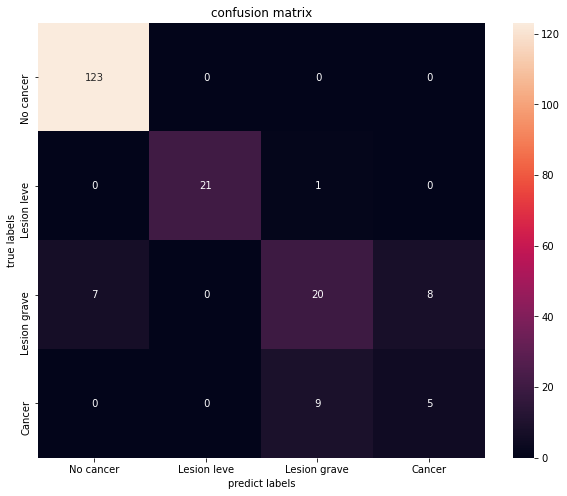

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,8))

ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt='2.0f')

ax.set_xlabel('predict labels')
ax.set_ylabel('true labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['No cancer', 'Lesion leve', 'Lesion grave', 'Cancer'])
ax.yaxis.set_ticklabels(['No cancer', 'Lesion leve', 'Lesion grave', 'Cancer'])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      1.00      1.00        22
           2       0.72      0.83      0.77        35
           3       0.43      0.21      0.29        14

    accuracy                           0.91       194
   macro avg       0.78      0.76      0.76       194
weighted avg       0.90      0.91      0.90       194



In [ ]:
save_dir = root_dir + 'Desarrollo Tesis/Desarrollo/modelos/'
#model.save(save_dir+'PruebaResnet50-Nuevo4123.h5')
model.save_weights(save_dir+'PruebaResnet50-Nuevo91_weight.h5')

In [ ]:
json_config = model.to_json()
with open('model_config91.json', 'w') as json_file:
  json_file.write(json_config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


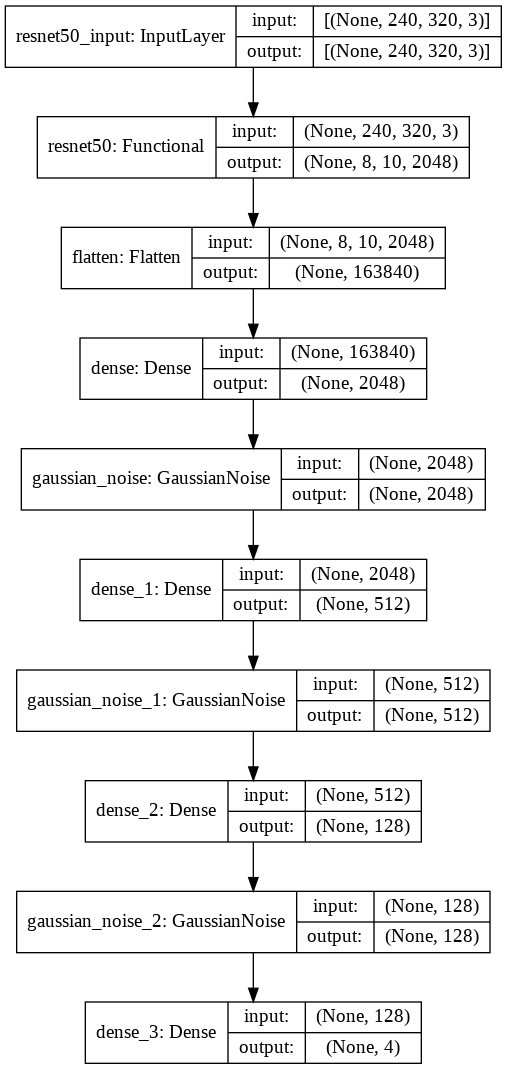

In [ ]:
from tensorflow.keras.utils import plot_model
import os
#os.environ["PATH"] += os.pathsep + 'content/'
plot_model(model, to_file='model_plot.png',show_shapes=True)

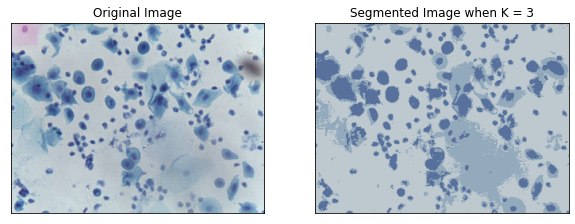

In [ ]:
K = 3
img = train_dir+"HSIEL/HSIL_1 (1).jpg"
img_file = image.load_img(img, target_size=(240, 320))
img_tensor = image.img_to_array(img_file) 
img_tensor /= 255.
pic_n = img_tensor.reshape(img_tensor.shape[0]*img_tensor.shape[1], img_tensor.shape[2])
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
img_end = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = img_end.reshape(img_tensor.shape[0],img_tensor.shape[1], img_tensor.shape[2])
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img_file)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cluster_pic)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
base_dir2 = '/content/drive/My Drive/Ciclo X/Tesis I/cervical cancer/modelo entrenado/'
img_base = base_dir2 + 'test/'
img_N = img_base + 'NIM'
img_L = img_base + 'LSIEL'
img_H = img_base + 'HSIEL'
img_S = img_base + 'SCC'
modelo_json2 = base_dir2 + 'model_config4123.json'
modelo_weight2 = base_dir2 + 'PruebaResnet50-Nuevo4123_weight.h5'

In [ ]:
def cargaImagenes(temp):
  X = []
  for file in tqdm(os.listdir(temp)):
    img = temp + '/' + file
    if img is not None:
      img_file = image.load_img(img, target_size=(240, 320))
      img_tensor = image.img_to_array(img_file) 
      pic_n = img_tensor.reshape(img_tensor.shape[0]*img_tensor.shape[1], img_tensor.shape[2])
      kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
      img_end = kmeans.cluster_centers_[kmeans.labels_]
      cluster_pic = img_end.reshape(img_tensor.shape[0],img_tensor.shape[1], img_tensor.shape[2])
      #samples = np.expand_dims(cluster_pic, 0)
      cluster_pic /= 255.
      X.append(cluster_pic)
  X = np.asarray(X)
  return X

In [ ]:
A = cargaImagenes(img_N)

100%|██████████| 123/123 [02:06<00:00,  1.03s/it]


In [ ]:
preds_N = model.predict(A).argmax(axis=1)
print(preds_N)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0]
